> 昨天，习大大在19大上做了长达3小时的报告，全文共32230字,共60页, 全球媒体瞩目。每词都会有媒体对报告中的高频词汇进行梳理，今天我也可以尝试利用Python和分词工具jieba来自己分析一下。

### 准备工作

获取全部报告文本,因原文本是doc格式, 不是太大,直接vi中copy保存 在data/xi.txt中

```bash
ls -lrt data

```

### 安装相关库

```bash
pip install jieba wordcloud pyecharts
```
上面的语句安装了python的3个神奇,
* jieba, 号称最好的Python中文分词组件,其主要用作分词使用,该分词有3中模式:
  * 精确模式，试图将句子最精确地切开，适合文本分析；
  * 全模式，把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义；
  * 搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
* wordcloud, 词云,顾名思义就是讲词语绘制成图片,漂亮的图片
* pyecharts, 百度出品的神器, 由python封装;

### Talk is cheap, show me the code! 

在分词这里,我写了如下几个函数:
* 定义停用词的处理函数:
```python
def without_stopwords(words):
    with open('data/stop_words.txt', encoding='utf8') as f:
        stop_words = f.read()
        for k in stop_words:
            words.pop(k, None)

    words.pop(' ', None)
    return words
```
* 定义自定义词典的jieba分词函数
```python
def get_words_without_stopwords(text, topK=20):
    jieba.analyse.set_idf_path("data/SogouLabDic.dic")
    tags = jieba.analyse.extract_tags(text, topK=topK, withWeight=True, allowPOS=())
    return dict(tags)
```
* 定义基于textRank算法的分词函数
```python
def get_word_textrank(text, topK=20):
    tags = jieba.analyse.textrank(text, topK=topK, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v'))
    return dict(tags)
```

* 定义词云生成函数
```python
def create_word_cloud(word_freq, to_file='alice.png', max_words=300):
    # backgroud pic
    alice_mask = np.array(Image.open('pic/map.jpeg'))

    stopwords = set(STOPWORDS)
    # stopwords.add("said")

    wc = WordCloud(background_color="black", max_words=max_words, mask=alice_mask,
                   stopwords=stopwords, max_font_size=80, random_state=42,
                   font_path='/System/Library/Fonts/PingFang.ttc')
    # generate word cloud
    # wc.generate_from_text(text)
    wc.generate_from_frequencies(word_freq)

    # store to file
    wc.to_file(to_file)
```

### 执行

执行的流程如下:
+ 读取报告文本
+ 分词
+ 去除停用词
+ 根据特定的算法获取高频词
  + 基于统计: 统计词频，位置等信息，计算句子权值，再简选取权值高的句子作为文摘，特点：简单易用，但对词句的使用大多仅停留在表面信息也就是根据分词的出现的次数,高的排前面;
  + textRank算法:种用于文本的基于图的排序算法。其基本思想来源于谷歌的PageRank算法, 通过把文本分割成若干组成单元(单词、句子)并建立图模型, 利用投票机制对文本中的重要成分进行排序, 仅利用单篇文档本身的信息即可实现关键词提取、文摘;

+ 输出分词以及相关的词频,排名;


按照之前的步骤,执行代码;

### 生成图表

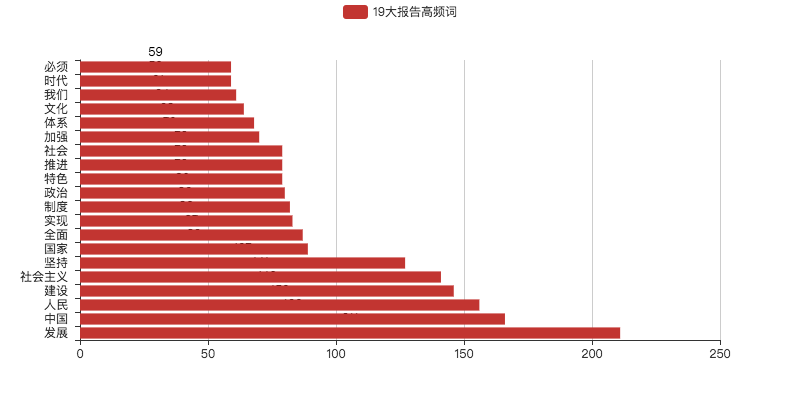

In [51]:
bar = Bar()   
bar.add("19大报告高频词", list(most_words.keys())[:20], list(most_words.values())[:20], 
        is_convert=True, is_label_show=True,yaxis_interval=0)

从数据中不难看出：
* **发展** 是第一要务
* 坚持 以 **人民** 为中心
* 全面 **建设** **社会主义** **现代化** 国家

再来个词云瞅瞅:

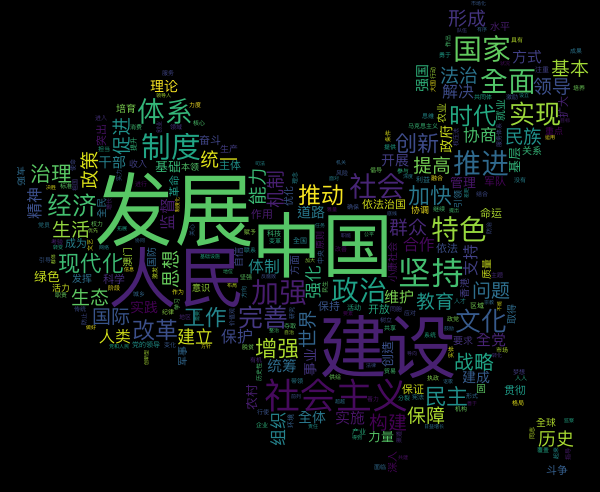

In [50]:
from IPython.display import Image
Image("textrank.png")